# 第8章 ニューラルネットワーク・ディープラーニングの応用（手書き数字の認識）

## 8.1 MNISTデータベース

In [1]:
# リスト 8-1-(1)
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

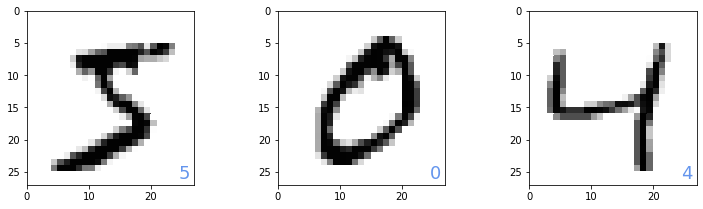

In [2]:
# リスト 8-1-(2)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1, 3, id + 1)
    img = x_train[id, :, :]
    plt.pcolor(255 - img)  # 白黒を反転して表示
    plt.text(
        24.5, 26, f"{y_train[id]}", color="cornflowerblue", fontsize=18)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
plt.show()

## 8.2 2層フィードフォワードネットワークモデル

In [3]:
# リスト 8-1-(3)
from tensorflow.keras.utils import to_categorical

# 訓練データの前処理
x_train = x_train.reshape(60000, 784)              # (A)
x_train = x_train.astype("float32")                # (B)
x_train = x_train / 255                            # (C)
y_train = to_categorical(y_train, num_classes=10)  # (D)
# テストデータの前処理
x_test = x_test.reshape(10000, 784)
x_test = x_test.astype("float32")
x_test = x_test / 255
y_test = to_categorical(y_test, num_classes=10)

In [4]:
# リスト 8-1-(4)
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tensorflow.random.set_seed(seed=1)                   # (A) 乱数の固定

# モデルの定義 ----------
model = Sequential()                                             # (B)
model.add(Dense(units=16, input_dim=784, activation="sigmoid"))  # (C)
model.add(Dense(units=10, activation="softmax"))                 # (D)
model.compile(                                                   # (E)
    loss="categorical_crossentropy", optimizer="adam",
    metrics=["accuracy"],
)

In [5]:
# リスト 8-1-(5)
import time

# 学習 ----------
start_time = time.time()
history = model.fit(
    x_train, y_train,
    batch_size=1000, epochs=10, verbose=1,  # (A)
    validation_data=(x_test, y_test),
)
score = model.evaluate(x_test, y_test, verbose=0)
calculation_time = time.time() - start_time

# 結果表示 ----------
print(f"Test loss: {score[0]:.4f}")
print(f"Test accuracy: {score[1]:.4f}")
print(f"Calculation time:{calculation_time:.2f} sec")

Epoch 1/10
60/60 [==============================] - 1s 8ms/step - loss: 1.9521 - accuracy: 0.4804 - val_loss: 1.6529 - val_accuracy: 0.7004
Epoch 2/10
60/60 [==============================] - 0s 5ms/step - loss: 1.4853 - accuracy: 0.7453 - val_loss: 1.3127 - val_accuracy: 0.7970
Epoch 3/10
60/60 [==============================] - 0s 5ms/step - loss: 1.2010 - accuracy: 0.8126 - val_loss: 1.0735 - val_accuracy: 0.8412
Epoch 4/10
60/60 [==============================] - 0s 5ms/step - loss: 0.9960 - accuracy: 0.8462 - val_loss: 0.9000 - val_accuracy: 0.8619
Epoch 5/10
60/60 [==============================] - 0s 5ms/step - loss: 0.8467 - accuracy: 0.8631 - val_loss: 0.7737 - val_accuracy: 0.8738
Epoch 6/10
60/60 [==============================] - 0s 5ms/step - loss: 0.7368 - accuracy: 0.8741 - val_loss: 0.6802 - val_accuracy: 0.8818
Epoch 7/10
60/60 [==============================] - 0s 6ms/step - loss: 0.6545 - accuracy: 0.8810 - val_loss: 0.6098 - val_accuracy: 0.8876
Epoch 8/10
60/60 [==

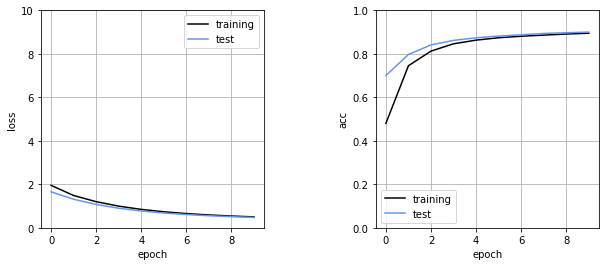

In [6]:
# リスト 8-1-(6)
plt.figure(figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

# 交差エントロピー誤差の表示 ----------
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], "black", label="training")
plt.plot(history.history["val_loss"], "cornflowerblue", label="test")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.ylim(0, 10)
plt.grid()

# 正答率の表示 ----------
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], "black", label="training")
plt.plot(history.history["val_accuracy"], "cornflowerblue", label="test")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("acc")
plt.ylim(0, 1)
plt.grid()
plt.show()

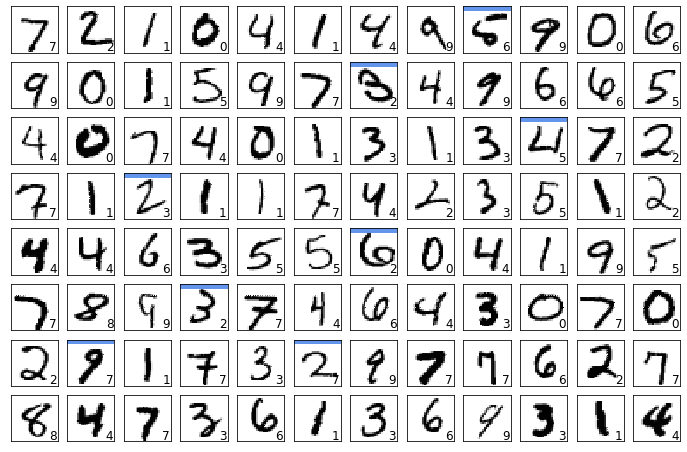

In [7]:
# リスト 8-1-(7)
def show_prediction():
    # テストデータに対する出力を計算 ----------
    n_show = 96
    # (A) yはn_show x 10の行列
    y = model.predict(x_test[:n_show, :])

    # 結果の描画 ----------
    plt.figure(figsize=(12, 8))
    for i in range(n_show):
        x = x_test[i, :]
        x = x.reshape(28, 28)
        # y[i, j]のj=0～9にはそれぞれの数字に対する確率が入っている
        # 最も確率が大きい数字を予測した数値とする
        prediction = np.argmax(y[i, :])
        plt.subplot(8, 12, i + 1)
        plt.gray()
        plt.pcolor(1 - x)  # 入力画像の表示（白黒を反転）
        plt.text(22, 25.5, f"{prediction}", fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot(  # 間違っていた場合の青い線の表示
                [0, 27], [1, 1], "cornflowerblue", linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")  # x軸の目盛りを消す
        plt.yticks([], "")  # y軸の目盛りを消す

# メイン ----------
show_prediction()
plt.show()

## 8.3 ReLU活性化関数

In [8]:
# リスト 8-1-(8)
tensorflow.random.set_seed(seed=1)  # 乱数の固定
# モデルの定義 -----------
model = Sequential()
model.add(Dense(units=16, input_dim=784, activation="relu"))  # (A)
model.add(Dense(units=10, activation="softmax"))
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam", metrics=["accuracy"],
)
# 学習 ----------
start_time = time.time()
history = model.fit(
    x_train, y_train,
    batch_size=1000, epochs=10, verbose=1,
    validation_data=(x_test, y_test),
)
score = model.evaluate(x_test, y_test, verbose=0)
calculation_time = time.time() - start_time

# 結果表示 ----------
print(f"Test loss: {score[0]:.4f}")
print(f"Test accuracy: {score[1]:.4f}")
print(f"Calculation time:{calculation_time:.2f} sec")

Epoch 1/10
60/60 [==============================] - 1s 7ms/step - loss: 1.3740 - accuracy: 0.6429 - val_loss: 0.7304 - val_accuracy: 0.8465
Epoch 2/10
60/60 [==============================] - 0s 5ms/step - loss: 0.5829 - accuracy: 0.8651 - val_loss: 0.4512 - val_accuracy: 0.8917
Epoch 3/10
60/60 [==============================] - 0s 5ms/step - loss: 0.4207 - accuracy: 0.8928 - val_loss: 0.3645 - val_accuracy: 0.9062
Epoch 4/10
60/60 [==============================] - 0s 5ms/step - loss: 0.3576 - accuracy: 0.9045 - val_loss: 0.3239 - val_accuracy: 0.9130
Epoch 5/10
60/60 [==============================] - 0s 5ms/step - loss: 0.3231 - accuracy: 0.9112 - val_loss: 0.3005 - val_accuracy: 0.9171
Epoch 6/10
60/60 [==============================] - 0s 5ms/step - loss: 0.3007 - accuracy: 0.9168 - val_loss: 0.2823 - val_accuracy: 0.9195
Epoch 7/10
60/60 [==============================] - 0s 5ms/step - loss: 0.2839 - accuracy: 0.9211 - val_loss: 0.2710 - val_accuracy: 0.9215
Epoch 8/10
60/60 [==

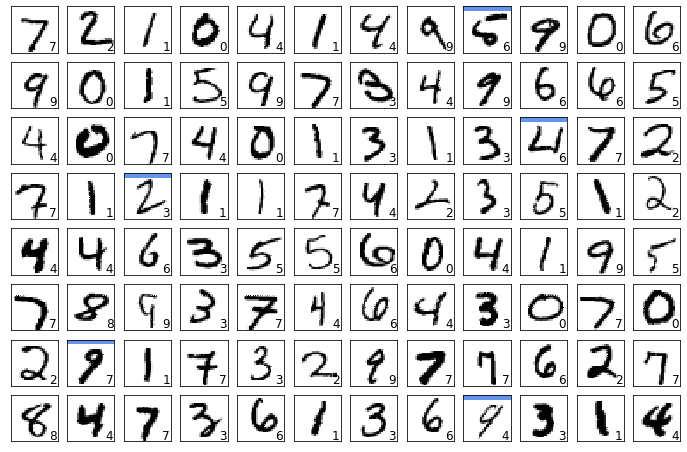

In [9]:
# リスト 8-1-(9)
show_prediction()
plt.show()

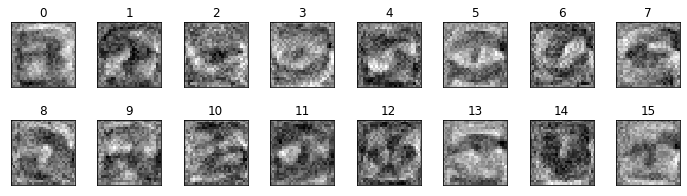

In [10]:
# リスト 8-1-(10)
# 1 層目の重みの視覚化
ws = model.layers[0].get_weights()[0]
plt.figure(figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)
for i in range(16):
    plt.subplot(2, 8, i + 1)
    w = ws[:, i]
    w = w.reshape(28, 28)
    plt.pcolor(-w)
    plt.title(f"{i}")
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
plt.show()

## 8.4 空間フィルター

In [11]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [12]:
# リスト 8-2-(1)
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# mnistデータのロード
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 訓練データの前処理
x_train = x_train.reshape(60000, 28, 28, 1)
x_train = x_train.astype("float32")
x_train = x_train / 255
y_train = to_categorical(y_train, num_classes=10)
# テストデータの前処理
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test.astype("float32")
x_test = x_test / 255
y_test = to_categorical(y_test, num_classes=10)

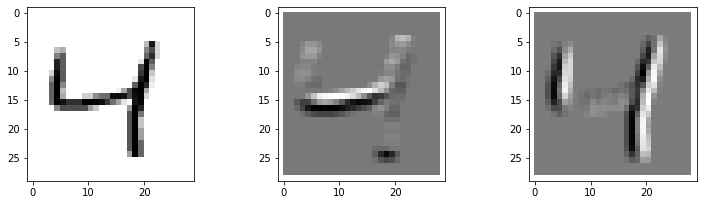

In [13]:
# リスト 8-2-(2)
%matplotlib inline
import matplotlib.pyplot as plt

# フィルターの準備 ----------
myfil1 = np.array([[ 1,  1,  1],                # (A)
                   [ 1,  1,  1],
                   [-2, -2, -2]], dtype=float)
myfil2 = np.array([[-2,  1,  1],                # (B) 
                   [-2,  1,  1],
                   [-2,  1,  1]], dtype=float)

# 入力画像の準備 ----------
id_img = 2  # 使用する画像のインデックス
x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)  # 入力画像
out_img1 = np.zeros_like(x_img)  # myfil1の出力用の行列を準備
out_img2 = np.zeros_like(x_img)  # myfil2の出力用の行列を準備

# フィルター処理 ----------
for ih in range(img_h - 3 + 1):
    for iw in range(img_w - 3 + 1):
        img_part = x_img[ih : ih + 3, iw : iw + 3]
        out_img1[ih + 1, iw + 1] \
            = img_part.reshape(-1) @ myfil1.reshape(-1)
        out_img2[ih + 1, iw + 1] \
            = img_part.reshape(-1) @ myfil2.reshape(-1)

# 表示 ----------
plt.figure(figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
# 元画像
plt.subplot(1, 3, 1)
plt.pcolor(1 - x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)
# myfil1の適用
plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)
# myfil2の適用
plt.subplot(1, 3, 3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

## 8.5 畳み込みニューラルネットワーク

In [14]:
# リスト 8-2-(3)
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense
import time

tensorflow.random.set_seed(seed=1)  # 乱数の固定

# モデルの定義 ----------
model = Sequential()
model.add(
    Conv2D(                       # (A) コンボリューション層
        filters=8, kernel_size=(3, 3),
        padding="same", input_shape=(28, 28, 1),
        activation="relu",
    )
)
model.add(Flatten())              # (B) 平滑化層
model.add(Dense(units=10, activation="softmax"))
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam", metrics=["accuracy"],
)

# 学習 ----------
start_time = time.time()
history = model.fit(
    x_train, y_train,
    batch_size=1000, epochs=20, verbose=1,
    validation_data=(x_test, y_test),
)
score = model.evaluate(x_test, y_test, verbose=0)
calculation_time = time.time() - start_time

# 結果表示 ----------
print(f"Test loss: {score[0]:.4f}")
print(f"Test accuracy: {score[1]:.4f}")
print(f"Calculation time:{calculation_time:.2f} sec")

Epoch 1/20
60/60 [==============================] - 6s 103ms/step - loss: 0.9050 - accuracy: 0.7897 - val_loss: 0.3645 - val_accuracy: 0.8996
Epoch 2/20
60/60 [==============================] - 6s 99ms/step - loss: 0.3273 - accuracy: 0.9067 - val_loss: 0.2809 - val_accuracy: 0.9214
Epoch 3/20
60/60 [==============================] - 6s 101ms/step - loss: 0.2617 - accuracy: 0.9262 - val_loss: 0.2274 - val_accuracy: 0.9381
Epoch 4/20
60/60 [==============================] - 6s 101ms/step - loss: 0.2127 - accuracy: 0.9410 - val_loss: 0.1849 - val_accuracy: 0.9472
Epoch 5/20
60/60 [==============================] - 6s 103ms/step - loss: 0.1746 - accuracy: 0.9515 - val_loss: 0.1549 - val_accuracy: 0.9578
Epoch 6/20
60/60 [==============================] - 6s 103ms/step - loss: 0.1453 - accuracy: 0.9604 - val_loss: 0.1320 - val_accuracy: 0.9639
Epoch 7/20
60/60 [==============================] - 6s 105ms/step - loss: 0.1258 - accuracy: 0.9657 - val_loss: 0.1167 - val_accuracy: 0.9685
Epoch 8

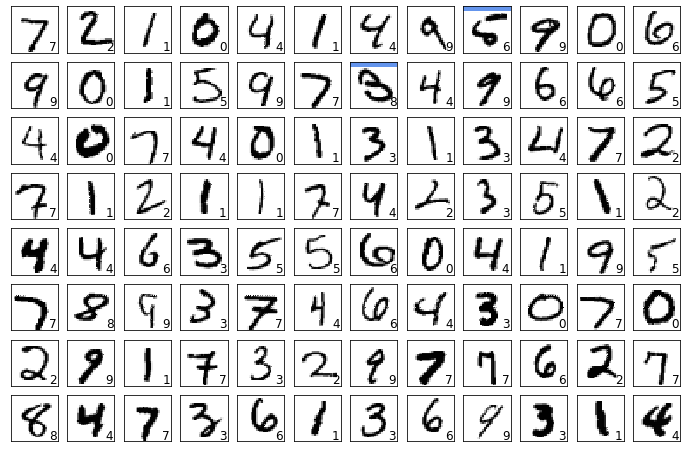

In [15]:
# リスト 8-1-(7)
def show_prediction():
    # テストデータに対する出力を計算 ----------
    n_show = 96
    # (A) yはn_show x 10の行列
    y = model.predict(x_test[:n_show, :])

    # 結果の描画 ----------
    plt.figure(figsize=(12, 8))
    for i in range(n_show):
        x = x_test[i, :]
        x = x.reshape(28, 28)
        # y[i, j]のj=0～9にはそれぞれの数字に対する確率が入っている
        # 最も確率が大きい数字を予測した数値とする
        prediction = np.argmax(y[i, :])
        plt.subplot(8, 12, i + 1)
        plt.gray()
        plt.pcolor(1 - x)  # 入力画像の表示（白黒を反転）
        plt.text(22, 25.5, f"{prediction}", fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot(  # 間違っていた場合の青い線の表示
                [0, 27], [1, 1], "cornflowerblue", linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")  # x軸の目盛りを消す
        plt.yticks([], "")  # y軸の目盛りを消す

# リスト 8-2-(4)
show_prediction()
plt.show()


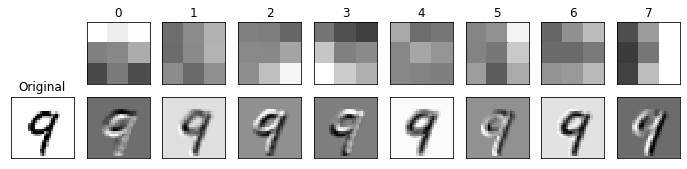

In [16]:
# リスト 8-2-(5)
plt.figure(figsize=(12, 2.5))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

# 入力画像(original)の表示 ----------
id_img = 12  # 使用する画像のインデックス
x_img = x_test[id_img, :, :, 0]
img_h, img_w = 28, 28  # 画像サイズ
x_img = x_img.reshape(img_h, img_w)
plt.subplot(2, 9, 10)
plt.gray()
plt.pcolor(-x_img)
plt.title("Original")
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")

# フィルターとフィルター処理した画像の表示 ----------
ws = model.layers[0].get_weights()[0]  # (A) フィルターの重み取得
max_w, min_w = np.max(ws), np.min(ws)  # 重みの最大最小値
for i in range(8):
    # フィルターの準備
    w = ws[:, :, 0, i]
    w = w.reshape(3, 3)
    # フィルターの表示
    plt.subplot(2, 9, i + 2)
    plt.pcolor(-w, vmin=min_w, vmax=max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title(f"{i}")
    # フィルター処理した画像の作成
    out_img = np.zeros_like(x_img)
    for ih in range(img_h - 3 + 1):  # フィルター処理
        for iw in range(img_w - 3 + 1):
            img_part = x_img[ih : ih + 3, iw : iw + 3]
            out_img[ih + 1, iw + 1] = \
                img_part.reshape(-1) @ w.reshape(-1)
    # フィルター処理した画像の表示
    plt.subplot(2, 9, i + 11)
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")
plt.show()

## 8.6 プーリング

## 8.7 ドロップアウト

## 8.8 集大成のMNIST認識ネットワークモデル

In [17]:
# リスト 8-2-(6)
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import time

tensorflow.random.set_seed(seed=1)  # 乱数の固定

# モデルの定義 ----------
model = Sequential()
model.add(
    Conv2D(
        filters=16, kernel_size=(3, 3), 
        input_shape=(28, 28, 1), activation="relu",
    )
)
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))         # (A) 最大プーリング層
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))         # (B) 最大プーリング層
model.add(Dropout(rate=0.25))                     # (C) ドロップアウト層
model.add(Flatten())
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(rate=0.25))                     # (D) ドロップアウト層
model.add(Dense(units=10, activation="softmax"))
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam", metrics=["accuracy"],
)

# 学習 ----------
start_time = time.time()
history = model.fit(
    x_train, y_train,
    batch_size=1000, epochs=20, verbose=1,
    validation_data=(x_test, y_test),
)
score = model.evaluate(x_test, y_test, verbose=0)
calculation_time = time.time() - start_time

# 結果表示 ----------
print(f"Test loss: {score[0]:.4f}")
print(f"Test accuracy: {score[1]:.4f}")
print(f"Calculation time:{calculation_time:.2f} sec")

Epoch 1/20
60/60 [==============================] - 40s 655ms/step - loss: 0.7716 - accuracy: 0.7642 - val_loss: 0.1525 - val_accuracy: 0.9553
Epoch 2/20
60/60 [==============================] - 39s 655ms/step - loss: 0.1514 - accuracy: 0.9543 - val_loss: 0.0714 - val_accuracy: 0.9772
Epoch 3/20
60/60 [==============================] - 40s 666ms/step - loss: 0.0975 - accuracy: 0.9707 - val_loss: 0.0527 - val_accuracy: 0.9830
Epoch 4/20
60/60 [==============================] - 40s 670ms/step - loss: 0.0766 - accuracy: 0.9766 - val_loss: 0.0417 - val_accuracy: 0.9861
Epoch 5/20
60/60 [==============================] - 40s 673ms/step - loss: 0.0632 - accuracy: 0.9812 - val_loss: 0.0349 - val_accuracy: 0.9895
Epoch 6/20
60/60 [==============================] - 40s 668ms/step - loss: 0.0538 - accuracy: 0.9832 - val_loss: 0.0313 - val_accuracy: 0.9904
Epoch 7/20
60/60 [==============================] - 41s 680ms/step - loss: 0.0482 - accuracy: 0.9853 - val_loss: 0.0268 - val_accuracy: 0.9912

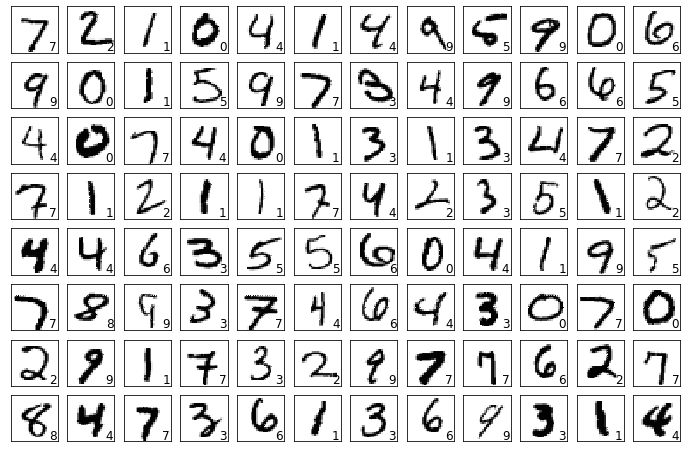

In [18]:
# リスト 8-2-(7)
show_prediction()
plt.show()